In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Read in data from years 2015 to 2019

data_2015to2019 = pd.read_csv('../Resources/FINAL_MERGE_df.csv')

In [11]:
# Count datapoints before checking for null values

data_2015to2019.count()

ITIN_ID              463790
COUPONS              463790
YEAR                 463790
ORIGIN_AIRPORT_ID    463790
QUARTER              463790
ORIGIN               463790
DEST_AIRPORT_ID      463790
DEST                 463790
TICKET_CARRIER       463790
OPERATING_CARRIER    463790
REPORTING_CARRIER    463790
PASSENGERS           463790
FARE_CLASS           463790
DISTANCE_GROUP       463790
ITIN_GEO_TYPE        463790
ROUNDTRIP            463790
ITIN_FARE            463790
MILES_FLOWN          463790
dtype: int64

In [12]:
# Drop null values if they exist (none exist) and count records

data_2015to2019.dropna().count()

ITIN_ID              463790
COUPONS              463790
YEAR                 463790
ORIGIN_AIRPORT_ID    463790
QUARTER              463790
ORIGIN               463790
DEST_AIRPORT_ID      463790
DEST                 463790
TICKET_CARRIER       463790
OPERATING_CARRIER    463790
REPORTING_CARRIER    463790
PASSENGERS           463790
FARE_CLASS           463790
DISTANCE_GROUP       463790
ITIN_GEO_TYPE        463790
ROUNDTRIP            463790
ITIN_FARE            463790
MILES_FLOWN          463790
dtype: int64

In [13]:
# Remove ITIN ID column. This was used in cleaning and primarily used for databases. Should not affect data

data_2015to2019 = data_2015to2019.drop(['ITIN_ID','ORIGIN','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','COUPONS','ROUNDTRIP'], axis=1)
data_2015to2019.head()

,YEAR,QUARTER,DEST,TICKET_CARRIER,OPERATING_CARRIER,REPORTING_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,ITIN_FARE,MILES_FLOWN
0,2019,1,BDL,DL,9E,9E,3.0,Y,2,2.0,11.0,1064.0
1,2019,1,BDL,DL,9E,9E,1.0,X,2,2.0,28.0,1064.0
2,2019,1,BDL,DL,9E,9E,1.0,X,2,2.0,159.0,1064.0
3,2019,1,BDL,DL,9E,9E,2.0,X,2,2.0,176.0,1064.0
4,2019,1,BDL,DL,9E,9E,3.0,X,2,2.0,196.0,1064.0


In [14]:
shrink_data = data_2015to2019.sample(n=20000)

In [15]:
shrink_data.corr()

,YEAR,QUARTER,PASSENGERS,DISTANCE_GROUP,ITIN_GEO_TYPE,ITIN_FARE,MILES_FLOWN
YEAR,1.000000,0.007321,0.016317,0.072671,-0.031100,-0.070695,0.071126
QUARTER,0.007321,1.000000,-0.018902,0.013090,-0.003156,-0.014230,0.014218
PASSENGERS,0.016317,-0.018902,1.000000,0.020075,-0.002140,-0.144116,0.009925
DISTANCE_GROUP,0.072671,0.013090,0.020075,1.000000,-0.039334,0.272644,0.962903
ITIN_GEO_TYPE,-0.031100,-0.003156,-0.002140,-0.039334,1.000000,0.024077,-0.054147
ITIN_FARE,-0.070695,-0.014230,-0.144116,0.272644,0.024077,1.000000,0.290297
MILES_FLOWN,0.071126,0.014218,0.009925,0.962903,-0.054147,0.290297,1.000000


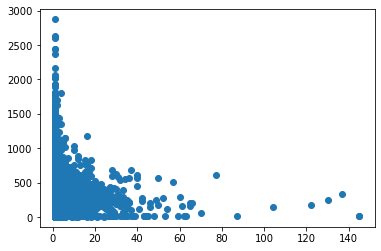

In [16]:
X_Passengers = shrink_data['PASSENGERS']

plt.scatter(shrink_data['PASSENGERS'], shrink_data['ITIN_FARE'])

#plt.plot(x_values, regress_values, color= 'r')
#plt.title('Weight vs Average Tumor Size for Capomulin')
#plt.xlabel('Weight (g)')
#plt.ylabel('Timepoint (days)')
#plt.annotate(line_eq,(19,37),color = 'r')
#plt.annotate(f'R-Squared= {r2_value}', (19,36), color = 'r')

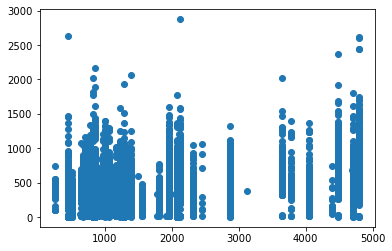

In [17]:
plt.scatter(shrink_data['MILES_FLOWN'], shrink_data['ITIN_FARE'])

In [18]:
# Defined independent (X) variables and dependent variable (y) for the model

X = shrink_data.drop(columns=['ITIN_FARE'])
y = shrink_data['ITIN_FARE']
print(X.shape,y.shape)

(20000, 11) (20000,)


In [ ]:
data_numerical_X = pd.get_dummies(X)
X = data_numerical_X
X

In [ ]:
# From SKlearn import RandomForestClassifier for purpose of identifying important variables

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X,y)
rf.score(X,y)

In [ ]:
importances = rf.feature_importances_
importances_mapped = sorted(zip(importances , X), reverse=True)
importances_mapped

In [ ]:
X_filtered = X[['YEAR','QUARTER','PASSENGERS','MILES_FLOWN']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X_scaler = MinMaxScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

In [ ]:
model.fit(X_train_scaled, y_train)

In [ ]:
model_train_accuracy = model.score(X_train_scaled, y_train)
model_test_accuracy = model.score(X_test_scaled, y_test)
print(f"Training Data Score: {model_train_accuracy}")
print(f"Testing Data Score: {model_test_accuracy}")